# t-sne 觀察 : 流形還原

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [2]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

circle, perplexity=4 in 1.1345691680908203 sec
circle, perplexity=6 in 1.1182966232299805 sec
circle, perplexity=9 in 1.113351583480835 sec
circle, perplexity=14 in 1.13606858253479 sec
circle, perplexity=21 in 1.2056126594543457 sec
circle, perplexity=30 in 1.2869210243225098 sec
circle, perplexity=45 in 1.270965576171875 sec
circle, perplexity=66 in 1.5431885719299316 sec
circle, perplexity=100 in 1.3272576332092285 sec


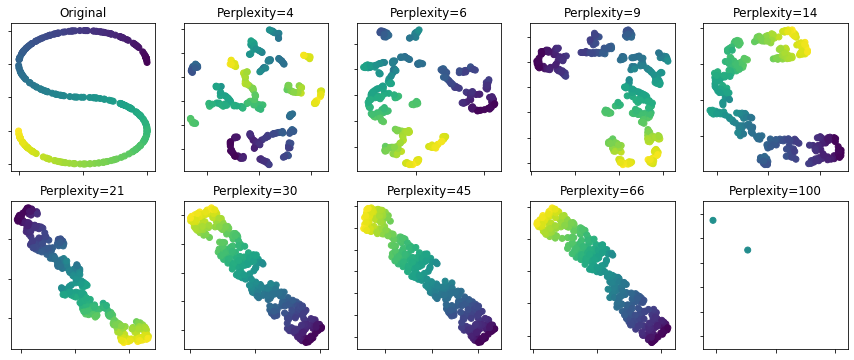

In [12]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定S曲線資料點
X, color = datasets.make_s_curve(n_samples, random_state=0)

# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
# 繪製不同 perplexity 下的 t-SNE 流形還原圖 (請注意! 語法也要對應調整)
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]
    t0=time()
    tsne = manifold.TSNE(n_components=n_components, init="random",
                        random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1=time()
    print("circle, perplexity={} in {} sec".format(perplexity,t1-t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:,0],Y[:,1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    #ax.axis("tight")
plt.show()    